In [123]:
import pandas as pd
import numpy as np

In [124]:
df = pd.read_csv("db/global-superstore-orders.csv")

In [125]:
# cross tab of customers and products with counts
pd.crosstab(df['Customer ID'], df['Product ID'], df["Quantity"], aggfunc=pd.Series.nunique)

Product ID,FUR-ADV-10000002,FUR-ADV-10000108,FUR-ADV-10000183,FUR-ADV-10000188,FUR-ADV-10000190,FUR-ADV-10000571,FUR-ADV-10000600,FUR-ADV-10000847,FUR-ADV-10001283,FUR-ADV-10001440,...,TEC-STA-10003330,TEC-STA-10003386,TEC-STA-10003447,TEC-STA-10003550,TEC-STA-10003925,TEC-STA-10004181,TEC-STA-10004536,TEC-STA-10004542,TEC-STA-10004834,TEC-STA-10004927
Customer ID,,,,,,,,,,,,,,,,,,,,,
AA-10315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA-10375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA-10480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA-10645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA-315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YS-21880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZC-11910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZC-21910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
from fastai.collab import CollabDataLoaders

# group by unique Customer ID and unique Product ID



customer_purchases = df.groupby(['Customer ID', 'Product Name']).agg({'Quantity': 'sum'}).reset_index()
customer_purchases.rename(columns={
    'Quantity': 'rating',
    'Customer ID': 'user',
    'Product Name': 'item',
}, inplace=True)

customer_purchases['rating'] = 1

display(customer_purchases['rating'].max())

1

In [127]:
customer_purchases.head()

,user,item,rating
0,AA-10315,"Acco Banker's Clasps, 5 3/4""-Long",1
1,AA-10315,"Advantus Stacking Tray, Erganomic",1
2,AA-10315,"Apple Speaker Phone, with Caller ID",1
3,AA-10315,Avery Binding System Hidden Tab Executive Style Index Sets,1
4,AA-10315,"Avery Index Tab, Economy",1


In [128]:
# this function requires a user, item, and rating column
dls = CollabDataLoaders.from_df(customer_purchases, bs=64)
dls.show_batch()

,user,item,rating
0,RW-19540,"Kleencut Shears, Easy Grip",1
1,ON-18715,"DAX Metal Frame, Desktop, Stepped-Edge",1
2,CC-12145,Wilson Jones Custom Binder Spines & Labels,1
3,BP-1095,"Hewlett Wireless Fax, High-Speed",1
4,SC-10680,"Boston Canvas, Water Color",1
5,MV-18190,Xerox 1914,1
6,DL-13330,"Ikea Corner Shelving, Mobile",1
7,EB-13930,Flexible Leather- Look Classic Collection Ring Binder,1
8,RC-19960,"Logitech Memory Card, Programmable",1
9,DH-13675,"SanDisk Flash Drive, Erganomic",1


In [129]:
import torch

n_users = len(dls.classes['user'])
n_items = len(dls.classes['item'])

# create 5 random factors for each user and movie
# factors are the latent features that we are trying to learn
n_factors = 5
user_factors = torch.randn(n_users, n_factors)
movie_factors = torch.randn(n_items, n_factors)

display(n_users)
display(n_items)

1591

3789

In [130]:
from fastai.collab import collab_learner

 # y_range is the range of the ratings, our maximum is 28
learn = collab_learner(dls, n_factors=50, y_range=(0,1.1))
learn.fit_one_cycle(5, 5e-3, wd=0.1)

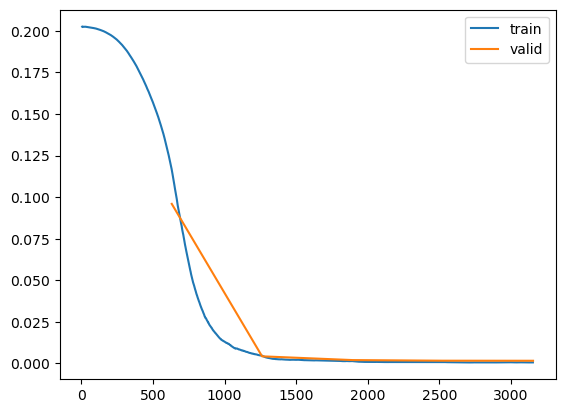

In [131]:
learn.recorder.plot_loss()

# Making Recommendations

In [132]:
# choose a test user
test_user = df['Customer ID'].unique()[1000]
# what products did this user buy in the past?
past_purchases = df[df['Customer ID'] == test_user].groupby(['Product Name', 'Sub-Category']).agg({'Quantity': 'sum'}).reset_index().sort_values('Quantity', ascending=False)
print(f"test_user: {test_user}")
display(past_purchases)

test_user: DB-13360


,Product Name,Sub-Category,Quantity
5,"Cameo Clasp Envelope, Security-Tint",Envelopes,13
39,Universal Premium White Copier/Laser Paper (20Lb. and 87 Bright),Paper,9
32,"SanDisk Note Cards, Multicolor",Paper,9
36,"Stockwell Clamps, 12 Pack",Fasteners,8
31,"SAFCO Steel Folding Chair, Set of Two",Chairs,8
33,"Sanford Pencil Sharpener, Fluorescent",Art,8
41,"Wilson Jones Index Tab, Recycled",Binders,7
6,Cardinal EasyOpen D-Ring Binders,Binders,7
19,"Hon Bag Chairs, Black",Chairs,7
12,"Eldon Shelving, Blue",Storage,7


In [133]:
# what products did this user not buy in the past?
# we will use this list to make recommendations
products_not_purchased = df[~df['Product Name'].isin(past_purchases['Product Name'])]['Product Name'].unique()
print(f"products_not_purchased: {len(products_not_purchased)}")

products_not_purchased: 3745


In [134]:
test_df = pd.DataFrame({
    'user': [test_user] * len(products_not_purchased),
    'item': products_not_purchased
})

dl = learn.dls.test_dl(test_df)
preds = learn.get_preds(dl=dl)

# merge predictions with product names
preds_df = pd.DataFrame({
    'item': products_not_purchased,
    'prediction': preds[0].numpy().flatten()
}).sort_values('prediction', ascending=False)
display(preds_df[:20])

,item,prediction
2374,"Hon Legal Exhibit Labels, Laser Printer Compatible",1.010392
2276,"Stanley Markers, Fluorescent",1.009861
873,"BIC Pencil Sharpener, Water Color",1.009846
1683,"Stanley Sketch Pad, Easy-Erase",1.009610
2768,"Stanley Highlighters, Water Color",1.009503
999,"Binney & Smith Canvas, Blue",1.009442
1312,"Binney & Smith Sketch Pad, Blue",1.009406
1444,"Stanley Pencil Sharpener, Water Color",1.009400
2451,"Acco Index Tab, Economy",1.008170
1469,"Panasonic Phone, Red",1.008140


In [135]:
# predict for user 1000
# this will return a list of predictions for each product
# the predictions are the ratings for each product
# the higher the rating, the more likely the user will like the product

# we will use this list to make recommendations
